<img src="https://ailo.telkomuniversity.ac.id/wp-content/uploads/2023/07/cropped-logo-stempel-ai-center-1-219x60.png" width="200px"/>

© 2023 AI Center for Learning and Optimization

[Instagram](https://www.instagram.com/aicenter.telu/) | [Website](https://ailo.telkomuniversity.ac.id/) | [LinkedIn](https://www.linkedin.com/in/ai-center-62111928a/)
<br/>
<br/>

In [ ]:
# Import semua tools yang dibutuhkan

# Import EDA (exploratory data analysis) dan plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# agar output dari perintah plot dapat langsung ditampilkan
%matplotlib inline

# Getting data ready
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model evaluation
from sklearn.metrics import r2_score, get_scorer, mean_squared_log_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RandomizedSearchCV

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/income.data.csv')

## EDA
#### Lakukan EDA dengan menampilkan **describe**,**info**,**scatter plot** dan **Scatter plot Korelasi** dari Data yang disediakan

In [ ]:
df

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
...,...,...,...
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664


In [ ]:
df.describe()

,Unnamed: 0,income,happiness
count,498.000000,498.000000,498.000000
mean,249.500000,4.466902,3.392859
std,143.904482,1.737527,1.432813
min,1.000000,1.506275,0.266044
25%,125.250000,3.006256,2.265864
50%,249.500000,4.423710,3.472536
75%,373.750000,5.991913,4.502621
max,498.000000,7.481521,6.863388


In [ ]:
df.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   income      498 non-null    float64
 2   happiness   498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


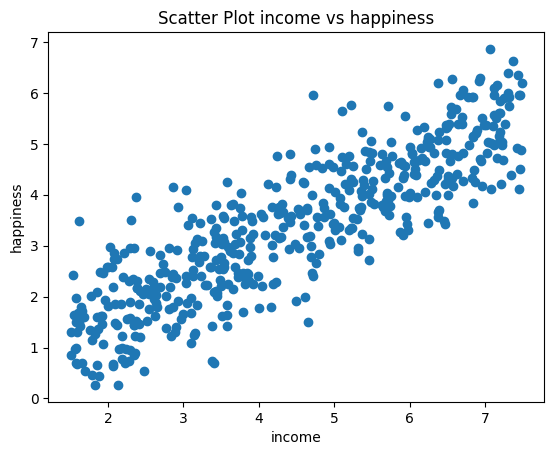

In [ ]:
# Data QRS dan P-R Interval
i_data = df['income']
h_data = df['happiness']

# Membuat scatter plot
plt.scatter(i_data, h_data)

# Memberi judul pada plot dan sumbu-sumbunya
plt.title('Scatter Plot income vs happiness')
plt.xlabel('income')
plt.ylabel('happiness')

# Menampilkan plot
plt.show()

Pearson Correlation Coefficient: 0.8656337299838432
P-value: 3.956245289953814e-151


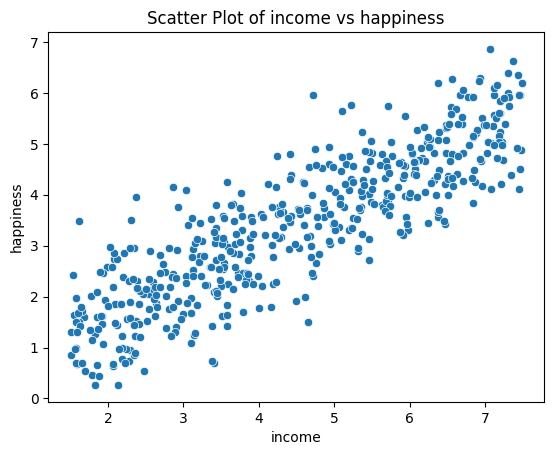

In [ ]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot untuk hubungan dua variabel numerik
sns.scatterplot(x='income', y='happiness', data=df)
plt.title('Scatter Plot of income vs happiness')

# Menghitung koefisien korelasi Pearson
corr_coefficient, p_value = pearsonr(df['income'], df['happiness'])
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Menampilkan plot
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

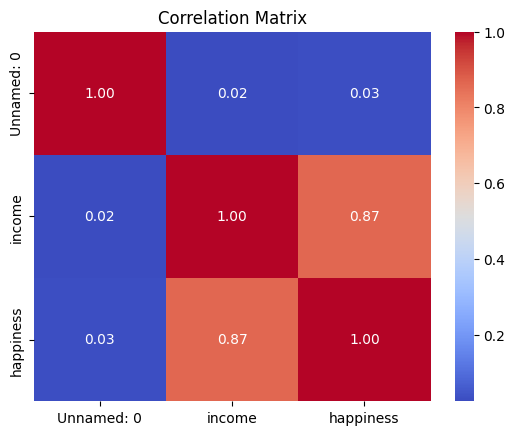

In [ ]:
# Matrix korelasi untuk melihat hubungan antar variabel numerik
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

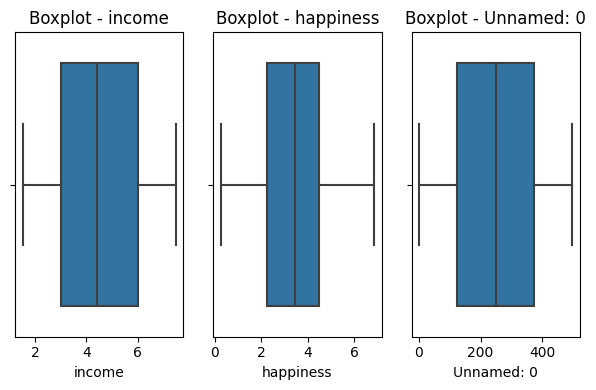

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setel ukuran plot
plt.figure(figsize=(6, 4))

# Menentukan jumlah baris dan kolom
num_rows = 1
num_cols = 3

# Loop melalui setiap kolom fitur pada DataFrame
features = ["income", "happiness", "Unnamed: 0"]
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot - {feature}')

# Tampilkan plot
plt.tight_layout()
plt.show()


## Prediction
#### Lakukan prediksi, bisa menggunakan salah satu dari cara berikut:  **fungsi rumus**, **tensorflow neural network** atau **sklearn**

In [ ]:
# set random seed
np.random.seed(42)
# Split data into X & y
X = df.drop(["happiness"], axis=1)
y = df[["happiness"]]

In [ ]:
# scaling the data
min_max_sc = MinMaxScaler()
stand_sc = StandardScaler()

# transfrom data
X_norm = min_max_sc.fit_transform(X)
X_stand = stand_sc.fit_transform(X)

In [ ]:
# Split data menjadi data train and test
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.svm import SVR

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create baseline SVM models for happiness prediction
svm_model_y = SVR(kernel='linear')  # Dapat memilih kernel berbeda (linear, rbf, polynomial, etc.)
svm_model_y.fit(X_train_scaled, y_train)
y_pred = svm_model_y.predict(X_test_scaled)
mse_y = mean_squared_error(y_test, y_pred)
print('Baseline SVM Model for happiness:')
print('Mean Squared Error:', mse_y)

Baseline SVM Model for happiness:
Mean Squared Error: 0.5743295499863178


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Prediksi untuk happiness
mae_y = mean_absolute_error(y_test, y_pred)
r2_y = r2_score(y_test, y_pred)

print('Metrik Evaluasi untuk Beban Pemanasan:')
print('Mean Absolute Error (MAE):', mae_y)
print('R-squared (R2):', r2_y)

Metrik Evaluasi untuk Beban Pemanasan:
Mean Absolute Error (MAE): 0.6171612886075142
R-squared (R2): 0.725752006724395


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid untuk skema 1
param_grid_s1 = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Parameter grid untuk skema 2
param_grid_s2 = {
    'C': [1, 10, 20],  # Mengubah nilai C
    'kernel': ['rbf', 'sigmoid'],  # Mengganti kernel ke 'sigmoid'
    'gamma': ['scale', 'auto']
}

# Parameter grid untuk skema 3
param_grid_s3 = {
    'C': [15],  # Mengubah nilai C
    'kernel': ['poly'],  # Mengganti kernel ke 'poly'
    'gamma': ['scale', 'auto'],
    'degree': [5]
}

# Inisialisasi model SVM untuk semua skema
svm_model = SVR()

# Inisialisasi GridSearchCV untuk skema 1
grid_search_s1 = GridSearchCV(svm_model, param_grid=param_grid_s1, cv=5, scoring='neg_mean_squared_error')

# Inisialisasi GridSearchCV untuk skema 2
grid_search_s2 = GridSearchCV(svm_model, param_grid=param_grid_s2, cv=5, scoring='neg_mean_squared_error')

# Inisialisasi GridSearchCV untuk skema 3
grid_search_s3 = GridSearchCV(svm_model, param_grid=param_grid_s3, cv=5, scoring='neg_mean_squared_error')

# Melakukan pencarian hiperparameter untuk skema 1
grid_search_s1.fit(X_train_scaled, y_train)

# Melakukan pencarian hiperparameter untuk skema 2
grid_search_s2.fit(X_train_scaled, y_train)

# Melakukan pencarian hiperparameter untuk skema 3
grid_search_s3.fit(X_train_scaled, y_train)

# Menampilkan parameter terbaik untuk setiap skema
print('Best Parameters for Scheme 1 (SVM):', grid_search_s1.best_params_)
print('Best Parameters for Scheme 2 (SVM):', grid_search_s2.best_params_)
print('Best Parameters for Scheme 3 (SVM):', grid_search_s3.best_params_)

# Mengevaluasi model terbaik pada set pengujian untuk setiap skema
y_pred_s1 = grid_search_s1.best_estimator_.predict(X_test_scaled)
mse_y_s1 = mean_squared_error(y_test, y_pred_s1)
print('\nMean Squared Error (SVM Scheme 1):', mse_y_s1)

y_pred_s2 = grid_search_s2.best_estimator_.predict(X_test_scaled)
mse_y_s2 = mean_squared_error(y_test, y_pred_s2)
print('Mean Squared Error (SVM Scheme 2):', mse_y_s2)

y_pred_s3 = grid_search_s3.best_estimator_.predict(X_test_scaled)
mse_y_s3 = mean_squared_error(y_test, y_pred_s3)
print('Mean Squared Error (SVM Scheme 3):', mse_y_s3)

Best Parameters for Scheme 1 (SVM): {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Parameters for Scheme 2 (SVM): {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Parameters for Scheme 3 (SVM): {'C': 15, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}

Mean Squared Error (SVM Scheme 1): 0.5743295499863178
Mean Squared Error (SVM Scheme 2): 0.6215529823415131
Mean Squared Error (SVM Scheme 3): 0.86626490279227


EVALUATION

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid untuk skema 1
param_grid_s1 = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Inisialisasi model SVM untuk semua skema
svm_model = SVR()

# Inisialisasi GridSearchCV untuk skema 1
grid_search_s1 = GridSearchCV(svm_model, param_grid=param_grid_s1, cv=5, scoring='neg_mean_squared_error')

# Melakukan pencarian hiperparameter untuk skema 1
grid_search_s1.fit(X_train_scaled, y_train)

# Mengevaluasi model terbaik pada set pengujian untuk skema 1
y_pred_s1 = grid_search_s1.best_estimator_.predict(X_test_scaled)

# Metrik evaluasi untuk y (happiness)
mse_y_s1 = mean_squared_error(y_test, y_pred_s1)
mae_y_s1 = mean_absolute_error(y_test, y_pred_s1)
r2_y_s1 = r2_score(y_test, y_pred_s1)

print("Metrik Evaluasi untuk happiness (SVM Scheme 1):")
print(f"MSE: {mse_y_s1}")
print(f"MAE: {mae_y_s1}")
print(f"R-squared: {r2_y_s1}")

Metrik Evaluasi untuk happiness (SVM Scheme 1):
MSE: 0.5743295499863178
MAE: 0.6171612886075142
R-squared: 0.725752006724395


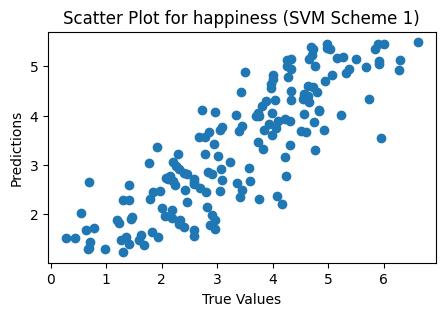

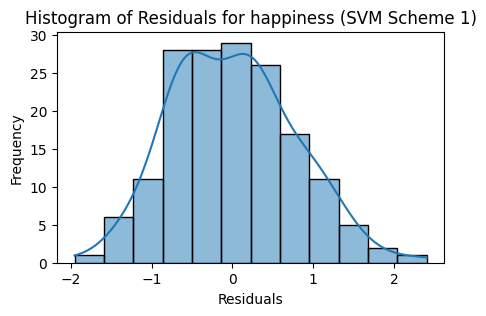

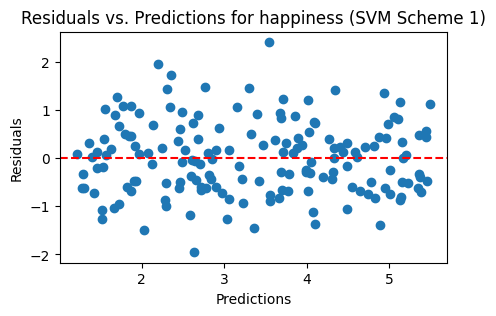

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_s1)
plt.title('Scatter Plot for happiness (SVM Scheme 1)')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Histogram residu
residuals_y = y_test.values.flatten() - y_pred_s1
plt.figure(figsize=(5, 3))
sns.histplot(residuals_y, kde=True)
plt.title('Histogram of Residuals for happiness (SVM Scheme 1)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residu vs. prediksi
plt.figure(figsize=(5, 3))
plt.scatter(y_pred_s1, residuals_y)
plt.title('Residuals vs. Predictions for happiness (SVM Scheme 1)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [ ]:
# Buat prediksi pada data tes (happiness)
y_pred_s1 = grid_search_s1.best_estimator_.predict(X_test_scaled)
y_pred_s1

array([3.30018194, 2.20379259, 3.22310319, 1.80272148, 1.77176982,
       2.46091625, 4.443247  , 4.83061339, 1.93844384, 3.46949098,
       4.08394997, 2.46268397, 2.90694044, 3.55456074, 2.77829585,
       1.87644878, 2.59849545, 5.12987773, 2.45144985, 4.07610151,
       1.86937533, 2.76638442, 2.71766397, 1.22312048, 4.58461276,
       1.72162738, 2.52110503, 5.45051089, 4.19737669, 4.10461158,
       1.42450525, 3.70099785, 2.83509163, 3.67279438, 4.04244004,
       3.9900166 , 1.29432831, 2.48783968, 1.39694281, 2.2870151 ,
       5.3585642 , 4.48814855, 5.05351242, 4.87038049, 2.90629789,
       2.12264683, 1.67810653, 3.1750247 , 2.66386886, 1.52152223,
       4.05432388, 3.06279174, 5.19798133, 3.70678635, 3.55524014,
       3.39368484, 3.60981636, 4.02725446, 4.98101776, 3.83411263,
       4.94923607, 1.54001856, 5.16162471, 2.36199522, 2.24929734,
       5.38217933, 4.77879032, 3.74793372, 2.48909421, 5.34208643,
       4.60597564, 3.42259751, 3.02920659, 3.05393422, 2.02978

       Actual  Predicted
0    4.754168   3.300182
1    4.159609   2.203793
2    2.295700   3.223103
3    2.311554   1.802721
4    2.861274   1.771770
..        ...        ...
160  1.357373   1.536876
161  4.658743   4.269217
162  3.565224   2.939892
163  1.907137   3.366650
164  4.216058   3.937879

[165 rows x 2 columns]
Rata-rata Aktual: 3.3416964096923976
Rata-rata Prediksi: 3.336214147962384


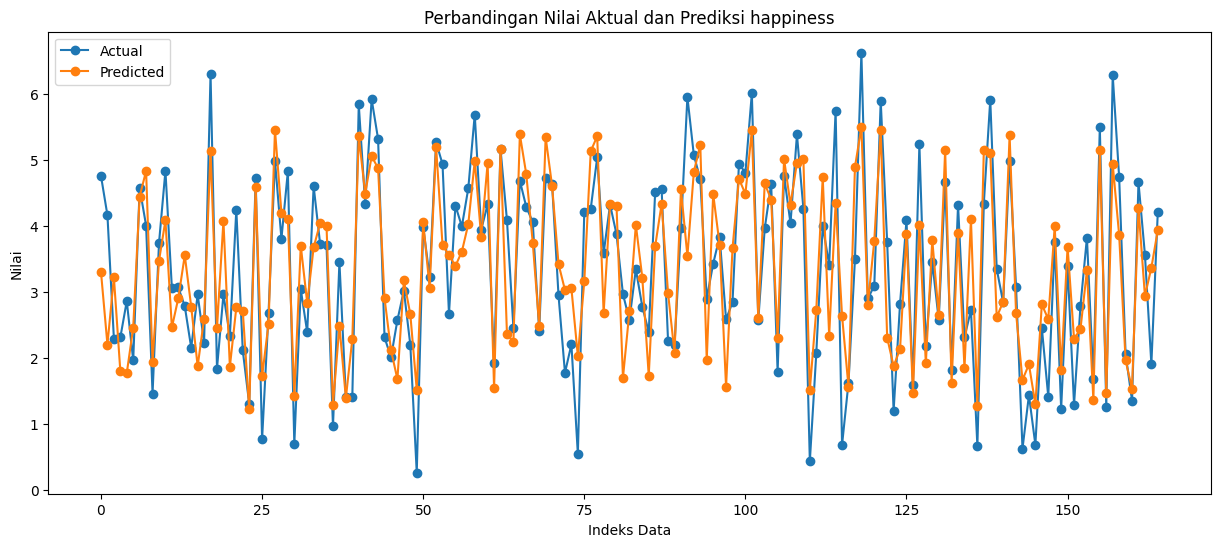

In [ ]:
import pandas as pd

# Data aktual
actual_values = y_test.values

# Buat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({
    'Actual': actual_values.flatten(),
    'Predicted': y_pred_s1.flatten()
})

# Tampilkan DataFrame
print(comparison_df)

# Hitung rata-rata aktual
mean_actual = np.mean(actual_values)

# Hitung rata-rata prediksi
mean_predicted = np.mean(y_pred_s1)

print(f"Rata-rata Aktual: {mean_actual}")
print(f"Rata-rata Prediksi: {mean_predicted}")

# Buat plot
plt.figure(figsize=(15, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted', marker='o')
plt.title('Perbandingan Nilai Aktual dan Prediksi happiness')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.legend()
plt.show()

In [ ]:
# Meletakkan hasil happiness prediction pada sebuah series
df_test_happiness = pd.Series(data = y_pred_s1, name="Happiness")
df_test_happiness

0      3.300182
1      2.203793
2      3.223103
3      1.802721
4      1.771770
         ...   
160    1.536876
161    4.269217
162    2.939892
163    3.366650
164    3.937879
Name: Happiness, Length: 165, dtype: float64

In [ ]:
# Menyimpan DataFrame ke file CSV
df_test_happiness.to_csv('predictions.csv', index=False)